<a href="https://colab.research.google.com/github/edleafvirtual/Iowa_Liquor_Sales/blob/main/Part_A--Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A. Project Name:  Iowa Liquor Sales (Part A).
- **Student Name:** Eduardo Galindez.
- **Coding Dojo Bootcamp:** Data Science.
  - **Stack:** Advanced Machine Learning.
- **Date:** August, 2022.

#B. Project Objective

Prepare the data from [Iowa Alcoholic Beverages Division 2022](https://abd.iowa.gov/) income from Class E alcohol liquor sales across licensed vendors using historical data (2019, 2020, and 2021) from [Iowa Liquor Sales](https://console.cloud.google.com/marketplace/product/iowa-department-of-commerce/iowa-liquor-sales?project=lively-clover-358509), to develop Visual Exploratory Analysis in order to:
- Determine which counties have been reported higher sales.
- Identify which counties are more profitable for Iowa Alcoholic Beverages Division, to implement agile checkpoints.

#C. Project Statement

In general, when a [Licensed Vendor](https://abd.iowa.gov/licensing/licensepermit-fees) sells alcoholic liquor to a store, this is the one who pays to Iowa State the fee per bottle sold (column 'State Bottle Retail' in our dataset).


There are a few concepts/elements that we should clarify:
- Class E is the license to sell an unopened alcoholic liquor bottle off-premises in Iowa.
- The 'State Bottle Retail' is a fee based on the size of the 'Pack' and the 'Bottle Volume (ml)'.
- The ' Sale (Dollars)' is 'Bottles Sold' times 'State Bottle Retail'.
  - This is the amount the stores pay to the [Iowa Alcoholic Beverages Division](https://abd.iowa.gov/sites/default/files/listing_manual_011717.pdf) per bottle sold. It's not the income per sale for store/vendor.
- 'Volume Sold (Gallons)' represents gallons sold by a transaction (row).

The main [dataset](https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy) has 24+ million rows, which includes the sales from January 1st, 2012 to current, making it pretty hard to work with Google Colaboratory. The next graphs would help us to visually describe why we limited our analysis to the past three years, in order to use Google Colaboratory as a notebook:


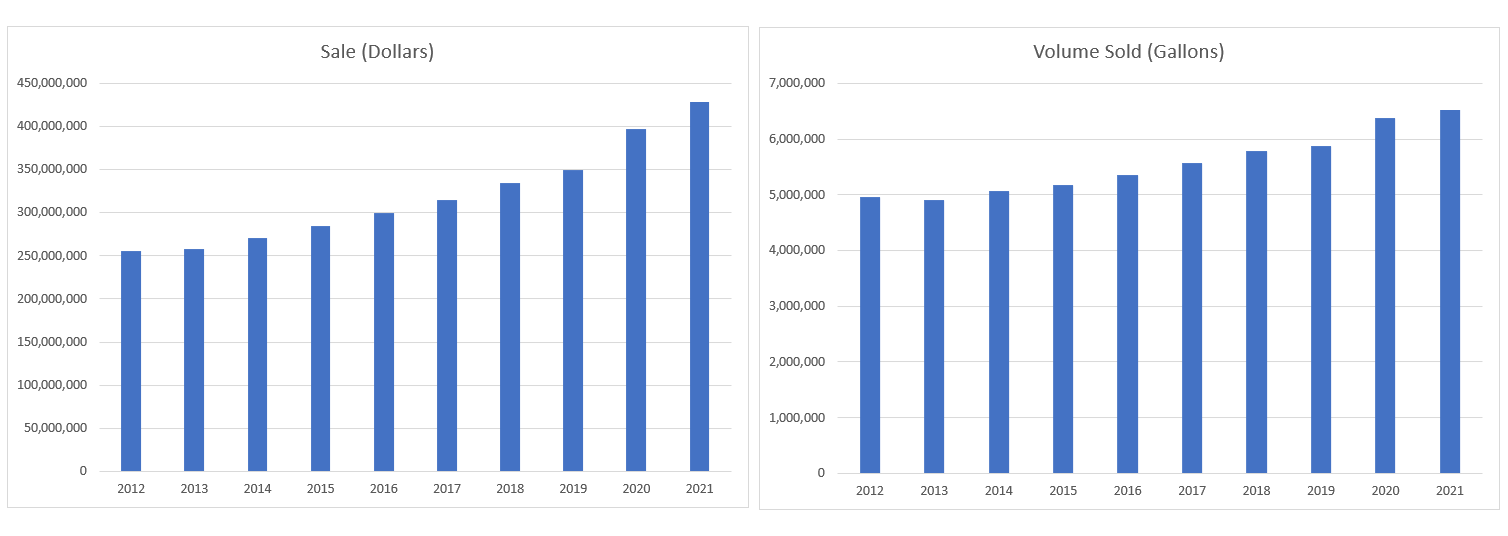

During Section 3, we will be working on determining which column should be our target: 'Sale (Dollars)' or 'Volume Sold (Gallons). On the one hand, the first choice appears to have a better correlation with the dataset, while on the other hand, 'Volume Sold (Gallons)' is a variable that could be used as a reference by the Iowa Alcoholic Beverage Division in case they wish to predict income by modifying the fees ('State Bottle Retail').





#D. Project Development

##1.- Libraries

In [ ]:
# Importing libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from matplotlib.ticker import PercentFormatter

##2.-  Loading Data

###2.1.- Mount and loading
- We downloaded 3 CSV files, one per year: [2019](https://data.iowa.gov/Sales-Distribution/2019-Iowa-Liquor-Sales/38x4-vs5h), [2020](https://data.iowa.gov/Sales-Distribution/2020-Iowa-Liquor-Sales/ktcd-5fm8), and [2021](https://data.iowa.gov/Sales-Distribution/2021-Iowa-Liquor-Sales/cc6f-sgik). Those will be [concatenated](https://pandas.pydata.org/docs/user_guide/merging.html) in order to have a new dataset including the years to work with. 

In [ ]:
# Mount data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data from 2019.
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo Classes/2. Machine Learning/Week 4/2019_Iowa_Liquor_Sales.csv')


In [ ]:
# Let's concatenate 3 datasets.
for i in range(2020,2022,1):
  s = f"/content/drive/MyDrive/Coding Dojo Classes/2. Machine Learning/Week 4/{i}_Iowa_Liquor_Sales.csv"
  df = df.append(pd.read_csv(s))

###2.2.- Data dictionary

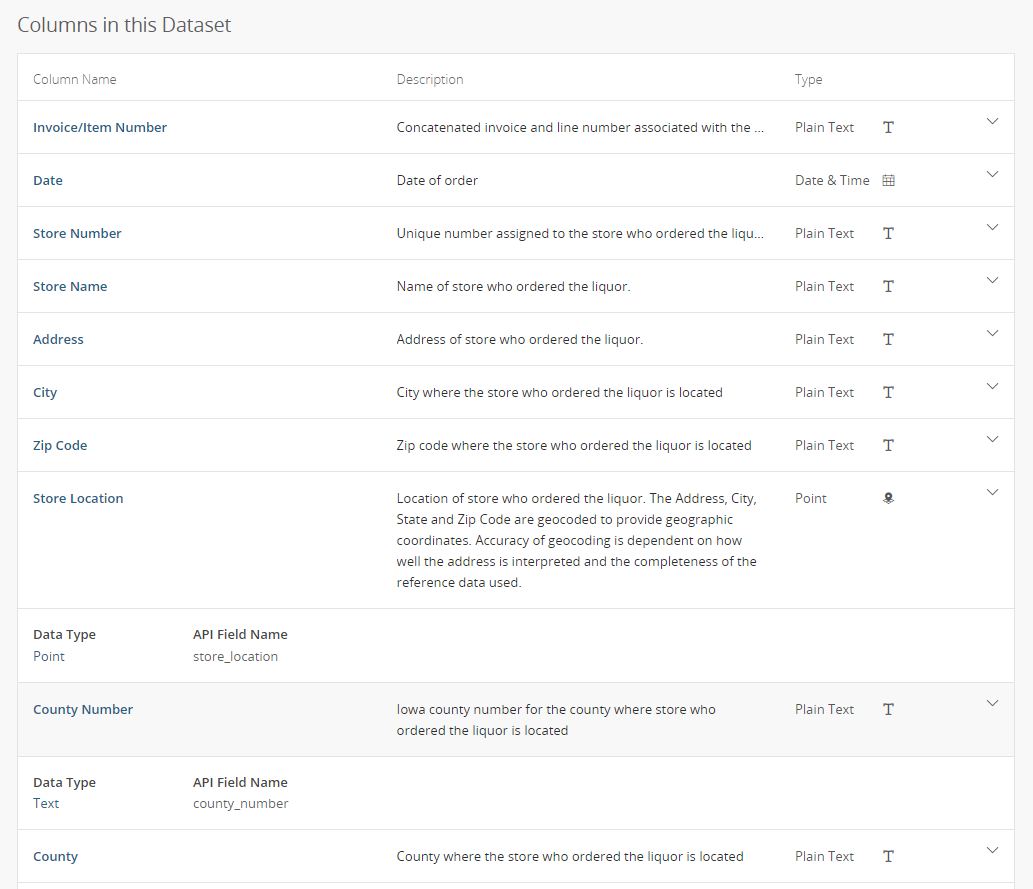


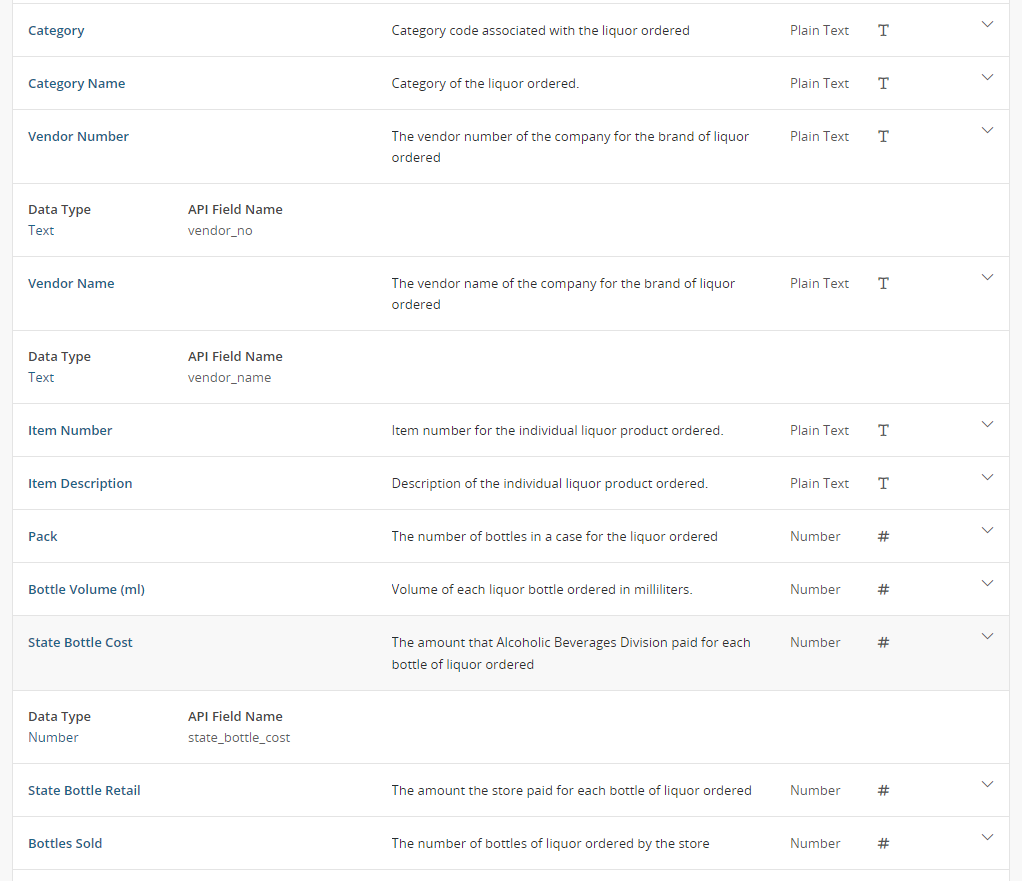

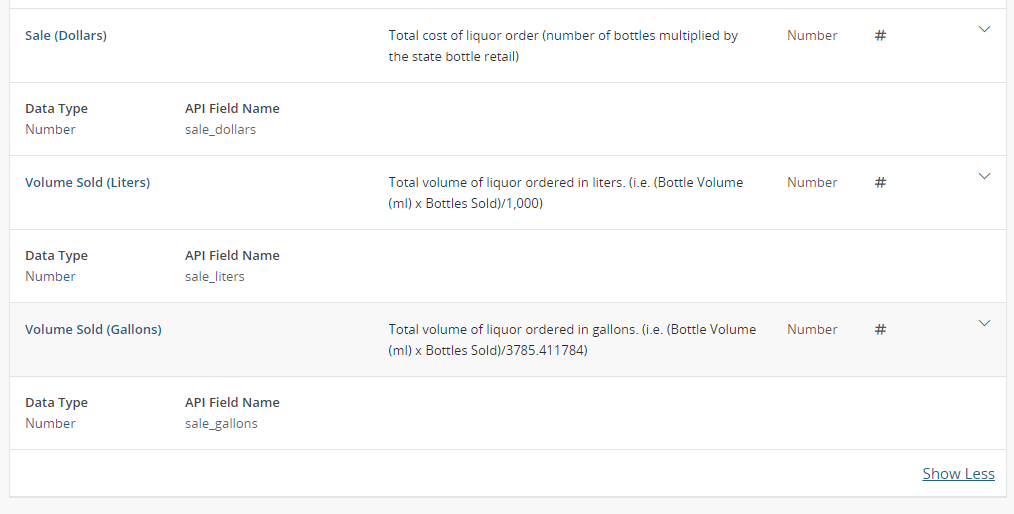

##3.- Data Understanding

In [ ]:
# Let's see the general information of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7617422 entries, 0 to 2622711
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               float64
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Liter

In [ ]:
# Let's display the size of our dataframe.
df.shape

(7617422, 24)

In [ ]:
# Looking for unique values per variable.
df.nunique()

Invoice/Item Number      7617422
Date                         828
Store Number                2127
Store Name                  2145
Address                     2082
City                         449
Zip Code                     484
Store Location              2674
County Number                 99
County                       129
Category                      59
Category Name                 59
Vendor Number                278
Vendor Name                  300
Item Number                 6224
Item Description            5857
Pack                          22
Bottle Volume (ml)            36
State Bottle Cost           1739
State Bottle Retail         1743
Bottles Sold                 498
Sale (Dollars)             15690
Volume Sold (Liters)        1067
Volume Sold (Gallons)       1050
dtype: int64

In [ ]:
# Let's check the statistical summary.
df.describe().round(2)

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,7617422.00,7612381.00,7612381.00,7613822.00,7617417.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00
mean,4016.56,51255.41,57.31,1054052.27,275.06,51353.79,12.16,845.85,10.86,16.28,11.54,154.12,9.36,2.47
std,1205.81,990.42,27.28,98659.80,140.56,79954.17,8.01,525.88,9.89,14.84,33.47,540.30,39.69,10.48
min,2106.00,50002.00,1.00,1011000.00,33.00,159.00,1.00,20.00,0.33,0.50,1.00,1.30,0.02,0.00
25%,2633.00,50315.00,31.00,1012200.00,205.00,27037.00,6.00,600.00,5.78,8.67,3.00,38.40,1.50,0.39
50%,4092.00,51055.00,63.00,1031200.00,260.00,39422.00,12.00,750.00,8.74,13.11,6.00,81.27,4.80,1.26
75%,5102.00,52302.00,77.00,1062500.00,395.00,64870.00,12.00,1000.00,13.50,20.25,12.00,161.64,10.50,2.77
max,9946.00,57222.00,99.00,1901200.00,978.00,999993.00,120.00,6000.00,2098.94,3148.41,13200.00,250932.00,13200.00,3487.07


In [ ]:
# Looking for missing data.
df.isna().sum()

Invoice/Item Number           0
Date                          0
Store Number                  0
Store Name                    0
Address                    5041
City                       5041
Zip Code                   5041
Store Location           767816
County Number              5041
County                     5041
Category                   3600
Category Name              3600
Vendor Number                 5
Vendor Name                   5
Item Number                   0
Item Description              0
Pack                          0
Bottle Volume (ml)            0
State Bottle Cost             0
State Bottle Retail           0
Bottles Sold                  0
Sale (Dollars)                0
Volume Sold (Liters)          0
Volume Sold (Gallons)         0
dtype: int64

In [ ]:
df.isna().sum().sum()

800231

In [ ]:
# Let's identify duplicate data.
df.duplicated().sum()

0

In [ ]:
# Identify inconsistencies in our 'object' columns.
pd.set_option('display.max_rows', None)
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print('\n')

*Notes:*
- The output for this code is not going to be showing here for aesthetic reasons: GitHub shows the whole list.

- Suggestion: to see the result/output, open the document in your favorite notebook to run the code.


**Observations:**
- We must keep in mind that the project objective is to predict the sales (Gallons or $$) for 2022. For this reason, we decided to drop the columns we consider don't affect the sales:
  - Invoice/Item Number.
  - Store Number.
  - Store Name.
  - City.
  - Address.
  - Zip Code.
  - Store Location.
  - Category.
  - Category Name.
  - Vendor Name.
  - County Number.
  - Vendor Number.
  - Item Number.
  - Item Description. It's a variable that could affect the sales from a consumer point of view, but like in this case we are focusing on the global sales instead per product, this column will be dropped too.

- According to the code above, our current dataset has:
  - 7,617,422 rows and 24 columns.
  - Around 10% of missing data (800,231).
    - The majority of the missing data is located in rows that will be drop.
    - The good new is that we don't have missing data on both possible target columns ('Sale (Dollars)' & 'Volume Sold (Gallons)').
  - 0 duplicate data.
    - Duplicate data is a value that won't be calculated on future code because after eliminating unique elements, the probability to have rows with equal values is high.
  - We identified some inconsistencies in dtype object columns but after dropping the columns described above, we are going to check this parameter again and fix any inconsistencies in features.

##4.- Data Cleaning
- In this section, we are going to prepare the data to have it clean and ready for the split between Features (X) and Target (y).

In [ ]:
# Drop unnecessary columns.
df.drop(columns = ['Invoice/Item Number', 'Store Number',
                   'City', 'Category Name', 'Vendor Name',
                   'Store Name', 'Address', 'Zip Code',
                   'Store Location', 'Category', 'County Number',
                   'Vendor Number', 'Item Number', 'Item Description'],
        inplace = True)
df.head(5)

,Date,County,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,01/02/2019,JOHNSON,24,200,6.24,9.36,24,224.64,4.8,1.26
1,01/02/2019,JOHNSON,12,500,11.50,17.25,12,207.00,6.0,1.58
2,01/02/2019,JOHNSON,24,375,3.21,4.82,24,115.68,9.0,2.37
3,01/02/2019,DUBUQUE,12,1000,4.17,6.26,12,75.12,12.0,3.17
4,01/02/2019,POLK,24,375,1.86,2.79,24,66.96,9.0,2.37


In [ ]:
# Looking for missing data.
df.isna().sum()

Date                        0
County                   5041
Pack                        0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [ ]:
df.isna().sum().sum()

5041

In [ ]:
# Identify inconsistencies in our 'object' columns.
pd.set_option('display.max_rows', None)
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print('\n')

*Notes:*
- The output for this code is not going to be showing here for aesthetic reasons: GitHub shows the whole list.

- Suggestion: to see the result/output, open the document in your favorite notebook to run the code.

In [ ]:
# Let's have a closer look in 'County'.
df.groupby('County').agg(value_count=('County','count')).sort_values(by=['County','value_count'], ascending=[True,False])

,value_count
County,
ADAIR,12031
ADAMS,6596
ALLAMAKEE,29953
APPANOOSE,23769
AUDUBON,9968
Adair,2483
BENTON,43828
BLACK HAWK,425752
BOONE,53337


In [ ]:
# Let's see the general information of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7617422 entries, 0 to 2622711
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   County                 object 
 2   Pack                   int64  
 3   Bottle Volume (ml)     int64  
 4   State Bottle Cost      float64
 5   State Bottle Retail    float64
 6   Bottles Sold           int64  
 7   Sale (Dollars)         float64
 8   Volume Sold (Liters)   float64
 9   Volume Sold (Gallons)  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 639.3+ MB


**Observations:**
- According to the code above:
  - Missing data:
    - In total, we have around ~ 0.2% missing data. We have decided to drop them because of the minimal impact on our dataset.
  - Inconsistencies in categorical features:
    - In 'County', some words are capitalized and some are not.
    - Also we identified misspellings in two counties.
  - Data type:
    - Column 'Date' dtype will be changed into datetime for feature engineering purposes.
- All the issues pointed will be addressed in code below.

In [ ]:
# Let's follow the procedure indicated above.
df.dropna(inplace=True)

In [ ]:
# Confirm there is not missing data.
df.isna().sum()

Date                     0
County                   0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [ ]:
df.isna().sum().sum()

0

In [ ]:
# Let's address the inconsistencies found in 'County'.
df['County'] = df['County'].str.upper()

In [ ]:
# Let's address the misspelings found in 'County'.
county_name_fix = {"CERRO GORD": 'CERRO GORDO',
            'POTTAWATTA': 'POTTAWATTAMIE',
            'BUENA VIST': 'BUENA VISTA'}

df['County'] = df['County'].replace(county_name_fix)

In [ ]:
# Looking for outliers in numerical features.
df.describe().round(2)

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,7612381.00,7612381.00,7612381.00,7612381.00,7612381.00,7612381.00,7612381.00,7612381.00
mean,12.16,845.80,10.86,16.28,11.54,154.14,9.36,2.47
std,8.01,525.88,9.90,14.84,33.47,540.33,39.69,10.48
min,1.00,20.00,0.33,0.50,1.00,1.30,0.02,0.00
25%,6.00,600.00,5.78,8.67,3.00,38.40,1.50,0.39
50%,12.00,750.00,8.74,13.11,6.00,81.30,4.80,1.26
75%,12.00,1000.00,13.50,20.25,12.00,161.64,10.50,2.77
max,120.00,6000.00,2098.94,3148.41,13200.00,250932.00,13200.00,3487.07


***Note:***
- In the next code lines, we are looking for each outlier identified as maximum value in dataframe above.


In [ ]:
# Let's see how many rows we have with 120 bottle per pack.
df[df['Pack'] == 120]

,Date,County,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
966899,05/18/2021,MONONA,120,50,0.66,0.99,120,118.8,6.0,1.58
1322448,07/06/2021,MONONA,120,50,0.66,0.99,120,118.8,6.0,1.58


In [ ]:
df['Pack'].value_counts()

12     4056485
6      2248774
24      702093
48      208852
10      195712
1        80765
8        43311
5        29753
44       18183
4        11788
3        11778
9         1351
60        1142
15        1023
30         482
20         455
18         196
16         193
28          30
2           12
120          2
32           1
Name: Pack, dtype: int64

**Observations:**
- A pack of 120 bottles look like is an input error, but the 'State bottle Retail' times 'Bottles Sold' is equal to $118.8 as 'Sale (Dollars)' shows.
- For now, we had decided to leave these rows like that.


In [ ]:
# Let's see how many rows we have with 6,000 mL per bottle.
df[df['Bottle Volume (ml)'] == 6000]

,Date,County,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
5470,01/02/2019,POLK,1,6000,99.0,148.50,1,148.50,6.0,1.58
9913,01/02/2019,JOHNSON,1,6000,99.0,148.50,1,148.50,6.0,1.58
17069,01/03/2019,WOODBURY,1,6000,99.0,148.50,1,148.50,6.0,1.58
18038,01/03/2019,JOHNSON,1,6000,99.0,148.50,1,148.50,6.0,1.58
18878,01/03/2019,WOODBURY,1,6000,99.0,148.50,1,148.50,6.0,1.58
20294,01/04/2019,POTTAWATTAMIE,1,6000,99.0,148.50,1,148.50,6.0,1.58
21357,01/04/2019,KOSSUTH,1,6000,99.0,148.50,2,297.00,12.0,3.17
23788,01/04/2019,POLK,1,6000,99.0,148.50,1,148.50,6.0,1.58
25203,01/04/2019,HAMILTON,1,6000,99.0,148.50,1,148.50,6.0,1.58
26542,01/04/2019,BLACK HAWK,1,6000,99.0,148.50,1,148.50,6.0,1.58


In [ ]:
len(df[df['Bottle Volume (ml)'] == 6000])

209

**Observations:**
- 209 rows identified with 6L bottles sold between 2019 and 2020, it doesn't look like an input error.
- Nothing to be fixed here.
  - One of the main reasons to work with the stakeholders when cleaning data, is because there will be questions about the business that should be answer for the expert on the subject. For example, size per bottle and per pack.

In [ ]:
# Let's see how many rows we have with $2,098.94 per bottle.
df[df['State Bottle Cost'] == 2098.94]

,Date,County,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
731532,04/16/2021,WAPELLO,1,750,2098.94,3148.41,2,6296.82,1.50,0.39
969061,05/19/2021,LINN,1,750,2098.94,3148.41,1,3148.41,0.75,0.19
981600,05/20/2021,BLACK HAWK,1,750,2098.94,3148.41,1,3148.41,0.75,0.19
1045893,05/28/2021,POLK,1,750,2098.94,3148.41,1,3148.41,0.75,0.19


**Observations:**
- We Google REMY COINTREAU USA INC and they sale cognac which price list is over $2k.
- For this reason, this outlier won't be considered as an input error.
- Column 'State Bottle Retail'  3148.41
- If we run this code ***df[df['State Bottle Retail'] == 3148.41]***, will display the same column above. This won't be also considered as an input error.

In [ ]:
# Let's see how many rows we have with $0.33 per bottle (outlier lower than min).
df[df['State Bottle Cost'] == 0.33]

,Date,County,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1932252,10/01/2020,BLACK HAWK,6,200,0.33,0.5,1,33.75,0.2,0.05
1935281,10/01/2020,JOHNSON,6,200,0.33,0.5,30,1012.50,6.0,1.58
1937628,10/01/2020,POLK,6,200,0.33,0.5,6,202.50,1.2,0.31
1937809,10/01/2020,JOHNSON,6,200,0.33,0.5,3,101.25,0.6,0.15
1966710,10/06/2020,POLK,6,200,0.33,0.5,6,202.50,1.2,0.31
1970454,10/07/2020,JOHNSON,6,200,0.33,0.5,12,405.00,2.4,0.63
1974726,10/07/2020,POTTAWATTAMIE,6,200,0.33,0.5,6,202.50,1.2,0.31
1978941,10/07/2020,KOSSUTH,6,200,0.33,0.5,1,33.75,0.2,0.05
1980160,10/08/2020,JOHNSON,6,200,0.33,0.5,12,405.00,2.4,0.63
1983140,10/08/2020,JOHNSON,6,200,0.33,0.5,1,33.75,0.2,0.05


In [ ]:
len(df[df['State Bottle Cost'] == 0.33])

15

**Observations:**
- We not only found 15 rows with bottles which 'State Bottle Cost' is $0.33, also on Google we found this low price product.
- This also wont be considered as an input error.

In [ ]:
# These code lines will generate the same result:
df[df['Bottles Sold'] == 13200.00]
df[df['Sale (Dollars)'] == 250932.00] # this because depends on 'Bottle Sold'.
df[df['Volume Sold (Liters)'] == 13200.00] # this because depends on 'Bottle Volume (ml)'.
df[df['Volume Sold (Gallons)'] == 3487.07] # this because depends on 'Volume Sold (Liters)'.

,Date,County,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1985112,10/08/2020,POLK,12,1000,12.67,19.01,13200,250932.0,13200.0,3487.07
741911,04/19/2021,POLK,12,1000,12.67,19.01,13200,250932.0,13200.0,3487.07
1313440,07/05/2021,POLK,12,1000,12.67,19.01,13200,250932.0,13200.0,3487.07


In [ ]:
# Let's see how many time it has been sold more than 1,000 bottles per transaction.
len(df[df['Bottles Sold'] > 1000])

754

**Observations:**
- We identified more than 754 transactions when were sold more than 1,000 bottles. 
- For that reason, 13,200 bottles sold won't be considered as an input error.

In [ ]:
# Now, let's address dtype modification.
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7612381 entries, 0 to 2622711
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   County                 object        
 2   Pack                   int64         
 3   Bottle Volume (ml)     int64         
 4   State Bottle Cost      float64       
 5   State Bottle Retail    float64       
 6   Bottles Sold           int64         
 7   Sale (Dollars)         float64       
 8   Volume Sold (Liters)   float64       
 9   Volume Sold (Gallons)  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 638.9+ MB


**Conclusions about data cleaning process:**
- Even when 120 bottles per pack look like an error, during this categorical exploratory process, we identified some values in 'Bottles Sold' higher than 'Pack'. For example in the dataframe above with 13,200 bottles sold which pack was of 12 bottles. For this reason, we had decided to eliminate the 'Pack' column too.
- After this dropping, we are going to consider our dataset as clean and ready to be used for Machine Learning modelation.

In [ ]:
# Drop unnecessary columns.
df.drop(columns = ['Pack'], inplace = True)

##5.- Feature Engineering
- In this section we are going to achieve two data engineering processes:
 1. Split 'Date' column. With this process, we are going to allow the option to get deeper into the analysis per Year, Quarter, and Week. The objective is to visualize the relationship with the sales per County through time periods.
 2. Calculate the profit per transaction (row). What we are looking for here, is to identify insights related to those Counties that consume more profitable products in order to implement agile processes of Quality Control.

In [ ]:
# Year of the 'Date'.
df['Year'] = df['Date'].dt.year.astype('object')

In [ ]:
# Name of the Quarter.
df['Quarter'] = df['Date'].dt.quarter.astype('object')

In [ ]:
# Week of the Year.
df['Week'] = df['Date'].dt.isocalendar().week.astype('object')

*Note:*
- Even when we haven't noticed if we are going to analyze the data per month, we have decided to add 'Month' column in the case is needed in Section 6.

In [ ]:
# Month of the Year.
df['Month'] = df['Date'].dt.month.astype('object')

In [ ]:
# Drop 'Date' column as is not needed anymore.
df = df.drop(columns='Date')

In [ ]:
# Let's check dtype for feature updates.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7612381 entries, 0 to 2622711
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   County                 object 
 1   Bottle Volume (ml)     int64  
 2   State Bottle Cost      float64
 3   State Bottle Retail    float64
 4   Bottles Sold           int64  
 5   Sale (Dollars)         float64
 6   Volume Sold (Liters)   float64
 7   Volume Sold (Gallons)  float64
 8   Year                   object 
 9   Quarter                object 
 10  Week                   object 
 11  Month                  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 755.0+ MB


In [ ]:
# Now, let's define a function to calculate 'State Profit'.
def calculate_profit(df):
  df['State Profit'] = df['Sale (Dollars)'] - (df['State Bottle Cost'] * df['Bottles Sold'])
  return df

In [ ]:
# Call the function.
df = calculate_profit(df) # this function will be useful for future achievements (2022 analysis).

In [ ]:
# Before moving forward, let's display how our dataset looks.
df.head()

,County,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Week,Month,State Profit
0,JOHNSON,200,6.24,9.36,24,224.64,4.8,1.26,2019,1,1,1,74.88
1,JOHNSON,500,11.50,17.25,12,207.00,6.0,1.58,2019,1,1,1,69.00
2,JOHNSON,375,3.21,4.82,24,115.68,9.0,2.37,2019,1,1,1,38.64
3,DUBUQUE,1000,4.17,6.26,12,75.12,12.0,3.17,2019,1,1,1,25.08
4,POLK,375,1.86,2.79,24,66.96,9.0,2.37,2019,1,1,1,22.32


##6.- Visual Exploration
- This section is part of our data understanding process, but this time with cleaned data and plotting some graphs.

In [ ]:
# Calculating the correlation.
corr = df.corr()
df.corr()

,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),State Profit
Bottle Volume (ml),1.000000,0.179338,0.179331,-0.022912,0.077160,0.142912,0.142975,0.076941
State Bottle Cost,0.179338,1.000000,0.999857,-0.067735,0.102385,0.000082,0.000078,0.101522
State Bottle Retail,0.179331,0.999857,1.000000,-0.067738,0.102396,0.000082,0.000078,0.101624
Bottles Sold,-0.022912,-0.067735,-0.067738,1.000000,0.819578,0.855879,0.855877,0.818456
Sale (Dollars),0.077160,0.102385,0.102396,0.819578,1.000000,0.841969,0.841968,0.998651
Volume Sold (Liters),0.142912,0.000082,0.000082,0.855879,0.841969,1.000000,1.000000,0.840860
Volume Sold (Gallons),0.142975,0.000078,0.000078,0.855877,0.841968,1.000000,1.000000,0.840859
State Profit,0.076941,0.101522,0.101624,0.818456,0.998651,0.840860,0.840859,1.000000


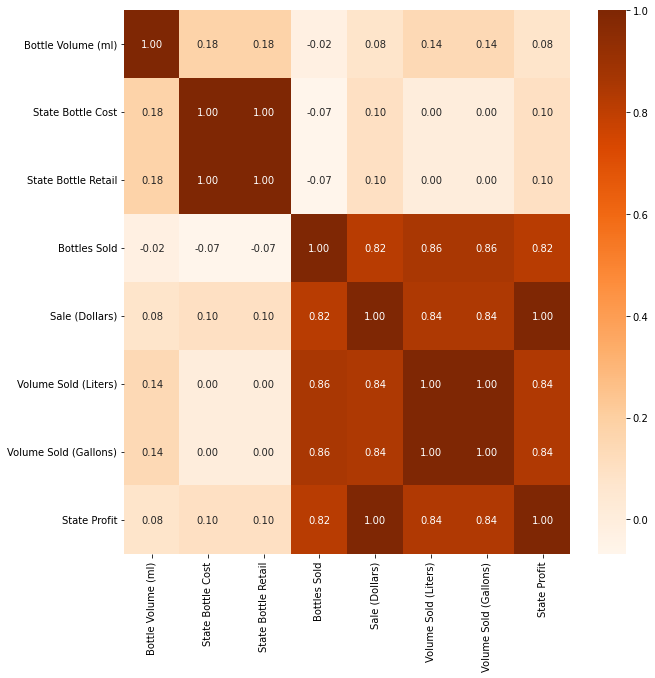

In [ ]:
# Let's plot our heatmap.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Oranges', annot=True, fmt='.2f');

**Conclusions about correlation:**
- According to the plot above:
  - Sale (Dollars):
    - Has a strong correlation with:
      - Bottles Sold = 0.82.
      - Volume Sold (Liters) = 0.84.
      - Volume Sold (Gallons) = 0.84.
      - State Profit = 1.00 (as was expected).
  - Volume Sold (Gallons):
    - Has a strong correlation with:
      - Bottles Sold = 0.86.
      - Sale (Dollars) = 0.84.
      - Volume Sold (Liters) = 1.00 (as was expected).
      - State Profit = 0.84.
- We have decided to declare 'Volume Sold (Gallons)' as our Target (y), because:
  - There is a stronger correlation between 'Bottle Sold' and 'Volume Sold (Gallons)' than 'Bottle Sold' and 'Sale (Dollars)'. In the future, a price variance could be seen as a high number (income per sale) even when the quantity sold has reduced.
  - The average of correlations within this variable is higher (0.885) than the correlations with dollar sales (0.875).
  

**Observations:**
- We must keep in mind that:
  - 'Sale (Dollars)' = 'Bottles Sold' x 'State Bottle Retail'
  - 'Volume Sold (Liters)' = 'Bottles Sold' x 'Bottle Volume (ml)'
  - 'Volume Sold (Gallons)' = 'Volume Sold (Liters)' / 3.8
  - 'State Profit' = 'Sales (Dollars)' - ('State Bottle Cost' x 'Bottles Sold')
- According to this, the features/variables to evaluate should be:
  - 'State Bottle Retail'.
  - 'Bottles Sold'.
  - 'Sale (Dollars)'.
  - 'Bottle Volume (ml)'.
  - 'Volume Sold (Liters)'.
  - 'Volume Sold (Gallons)'.
  - 'State Profit'.
- But remember our objective is to predict the sales, volume sold per gallons, for 2022. So:
  - Features to be analyzed individually:
    - 'Volume Sold (Gallons)': because is the Target.
    - 'State Profit': feature considered as strategic for Quality Control purposes.
  - Features won't be analyzed individually:
    - 'State Bottle Retail': because weak correlation.
    - 'Bottle Volume (ml)': because weak correlation.
    - 'Bottles Sold': variable related already with both main features.
    - 'Volume Sold (Liters)': feature similar to our target but in a different unit.
    - 'Sale (Dollars)': because we are working with profit instead of sales when the analysis is focused in US dollars.

**Next steps:**
1. Create different data frames to export them to MS Excel for two main reasons:
  - Avoid Google Colaboratory crush because of RAM/memory issues.
  - Generate our plots in Tableau.
2. Create a Pareto Diagram to evaluate the 80/20 relationship between volume sold per County.
3. Diagram a Pareto analysis to determine in which counties Iowa Alcoholic Beverages Division should improve its checkpoints, focus on those ones which are more profitable.
4. Plot our final graphs.

**STEP 1:**

In [ ]:
# Dataframe per Year, Quarter, Month, and Week for 'Volume Sold (Gallons)'.
vol_sold_df = df.groupby(['County', 'Year', 'Quarter', 'Month', 'Week'])['Volume Sold (Gallons)'].sum().sort_values()

In [ ]:
# Export it to MS Excel.
vol_sold_df.to_excel('/content/drive/MyDrive/DataFrame_Volume_Sold.xlsx', merge_cells=False)

In [ ]:
# Dataframe per Year, Quarter, Month, and Week for 'State Profit'.
time_frame_df = df.groupby(['County', 'Year', 'Quarter', 'Month', 'Week'])['State Profit'].sum().sort_values()

In [ ]:
# Export it to MS Excel.
time_frame_df.to_excel('/content/drive/MyDrive/DataFrame_State_Profit.xlsx', merge_cells=False)


**STEP 2:**
- Let's see which counties represent 80% of the sales (Gallons).

In [ ]:
# Let's evaluate the volume sold through the years per County.
pareto_vol_sold_df = pd.DataFrame(df.groupby(['County'])['Volume Sold (Gallons)'].sum().sort_values(ascending=False))

In [ ]:
# Let's rename the 'Volume Sold (Gallons)' column.
pareto_vol_sold_df.rename(columns = {'Volume Sold (Gallons)':'Volume Sold (Q in 3 years)'}, inplace = True)

In [ ]:
# Add a column to display cumulative percentage.
pareto_vol_sold_df['% Cumulative Sales'] = round(pareto_vol_sold_df['Volume Sold (Q in 3 years)'].cumsum() / pareto_vol_sold_df['Volume Sold (Q in 3 years)'].sum() * 100, 2)

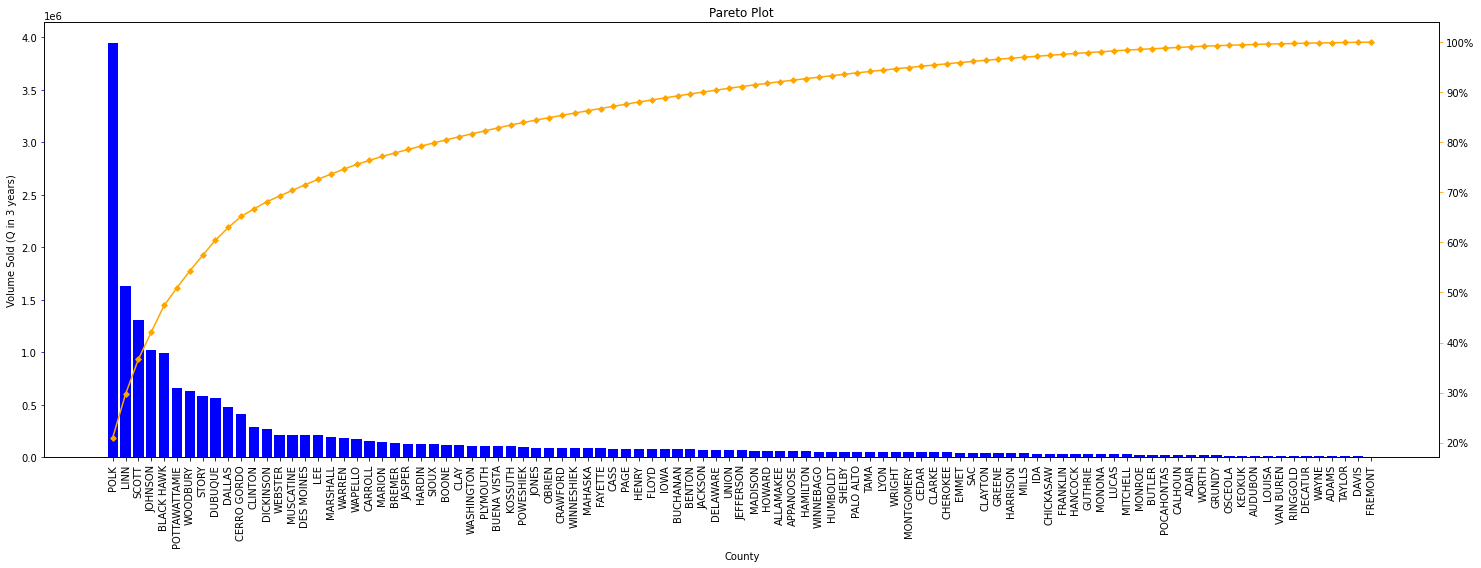

In [ ]:
# Defining aesthetics for our plot.
color1 = 'blue'
color2 = 'orange'
line_size = 4

# Creating a basic bar plot, using Pandas.
fig, ax = plt.subplots(figsize=(25,8))
ax.bar(pareto_vol_sold_df.index, pareto_vol_sold_df['Volume Sold (Q in 3 years)'], color=color1)
ax.set(xlabel='County', ylabel='Volume Sold (Q in 3 years)', title='Pareto Plot')
plt.xticks(rotation=90)

# Adding the line that will indicate how the percentage is cumulative.
# Remember that in Pareto, we are looking for the 80% cumulative in order to have the 20% of the items that generate ~80% of the sales.
ax2 = ax.twinx()
ax2.plot(pareto_vol_sold_df.index, pareto_vol_sold_df['% Cumulative Sales'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Specify axis colors.
ax.tick_params(axis='y', color=color1)
ax2.tick_params(axis='y', color=color2)

# Now, let's display our amazing plot.
plt.show();

In [ ]:
# Let's display the pareto dataframe to see which counties represents 80% of the sales.
pareto_vol_sold_df[:30]

,Volume Sold (Q in 3 years),% Cumulative Sales
County,,
POLK,3945778.77,21.02
LINN,1631208.70,29.71
SCOTT,1305308.89,36.66
JOHNSON,1018462.99,42.08
BLACK HAWK,998223.91,47.40
POTTAWATTAMIE,661853.07,50.93
WOODBURY,632920.15,54.30
STORY,584392.23,57.41
DUBUQUE,568637.87,60.44


In [ ]:
# Export to MS Excel our pareto dataframe.
pareto_vol_sold_df.to_excel('/content/drive/MyDrive/Pareto_DataFrame_Volume_Sold.xlsx', merge_cells=False)

*Notes:*
- According to our Pareto dataframe for Volume Sold per County, from Polk to Boone we identified the ~20% of the counties who buy 80.51%. We are talking about 27 counties of 99 in total (27.3%).

In the graph below we would see the relationship per County in our Pareto Analysis, using a treemap.

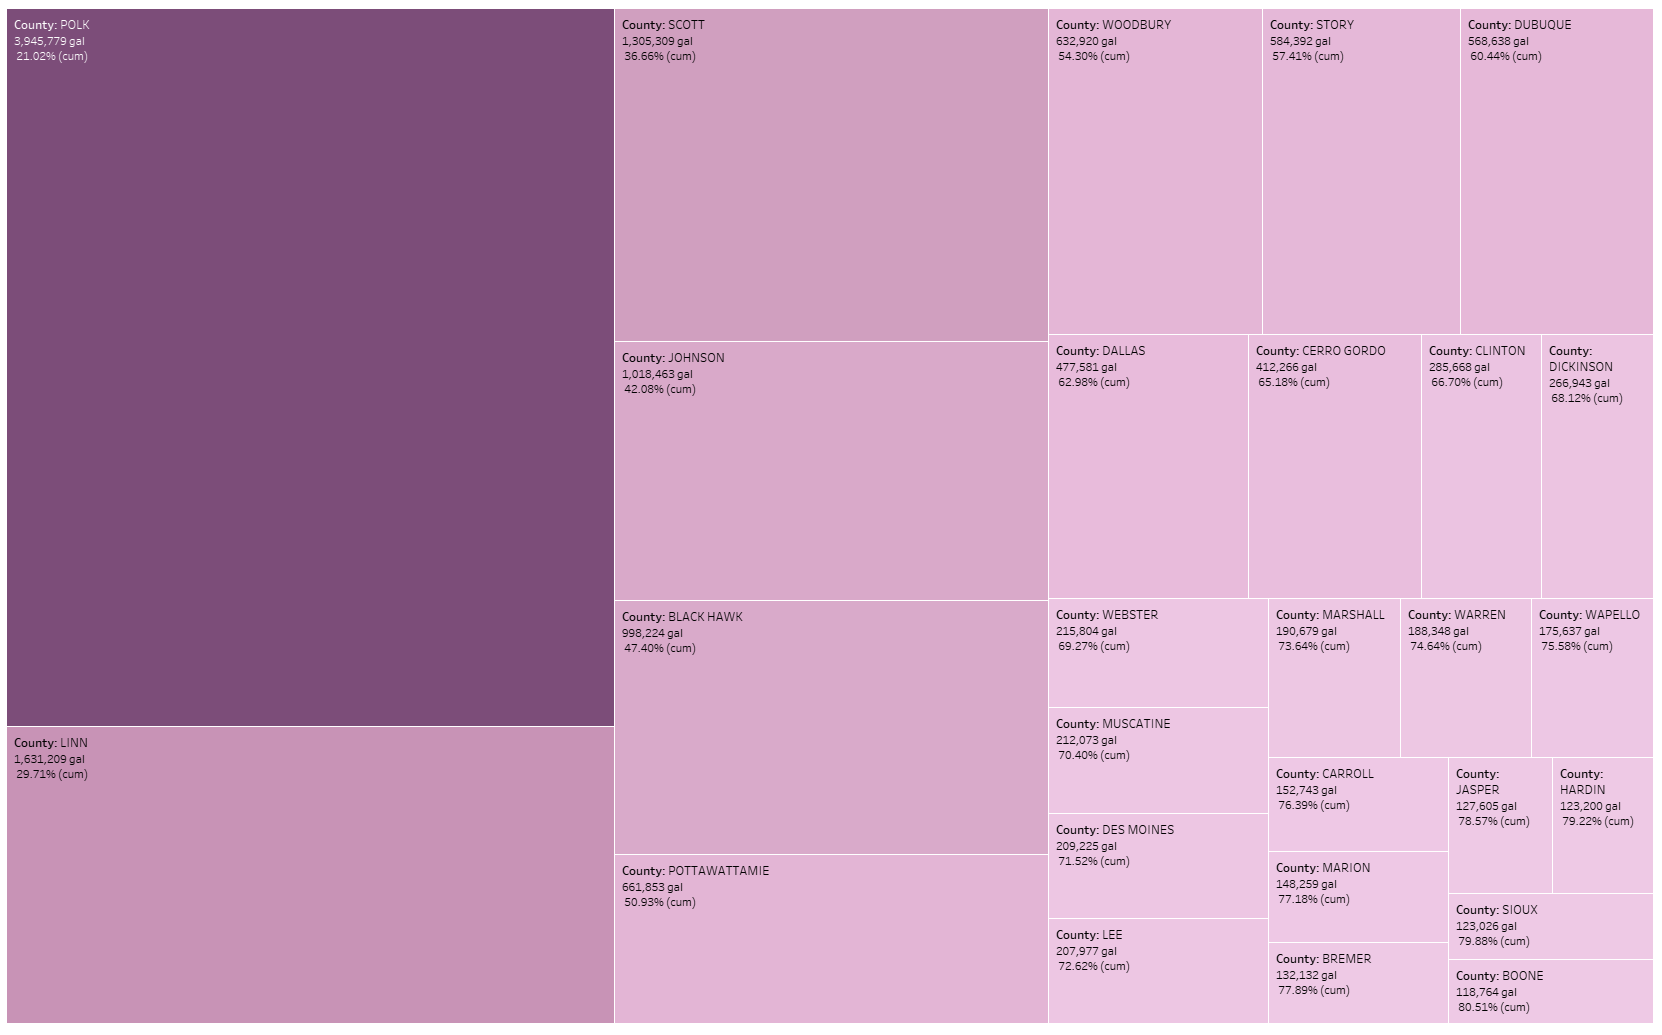

Let's see how the ~20% of the counties that represents ~80% of the sales, are geographically distributed in the State (Iowa).

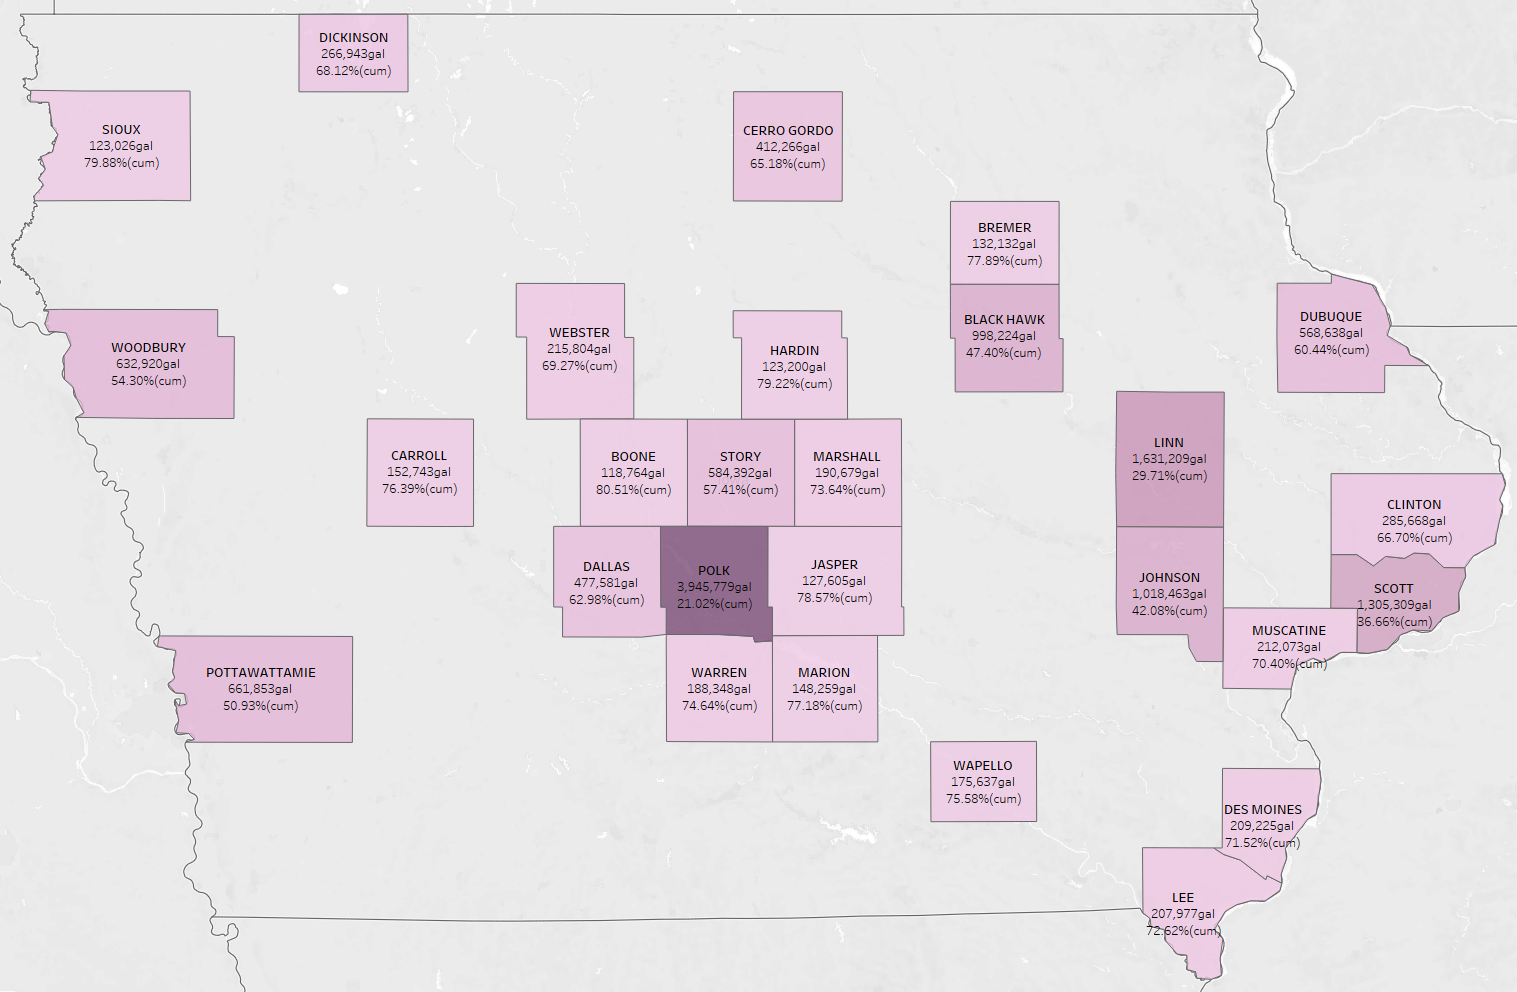

**STEP 3:**
- Now, let's have a look at the counties with more profitable consumption.

In [ ]:
# Let's evaluate the volume sold through the years per County.
pareto_profit_df = pd.DataFrame(df.groupby(['County'])['State Profit'].sum().sort_values(ascending=False))

In [ ]:
# Let's rename the 'Volume Sold (Gallons)' column.
pareto_profit_df.rename(columns = {'State Profit':'State Profit ($ in 3 years)'}, inplace = True)

In [ ]:
# Add a column to display cumulative percentage.
pareto_profit_df['% Cumulative Profit'] = round(pareto_profit_df['State Profit ($ in 3 years)'].cumsum() / pareto_profit_df['State Profit ($ in 3 years)'].sum() * 100, 2)

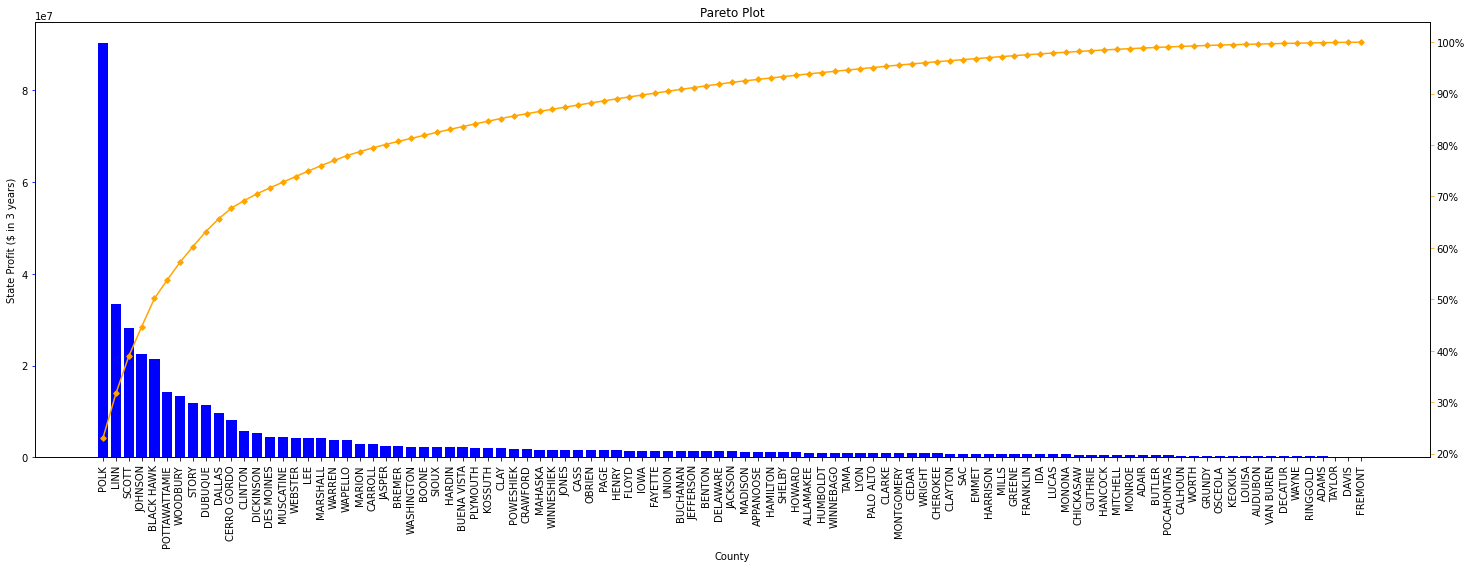

In [ ]:
# Defining aesthetics for our plot.
color1 = 'blue'
color2 = 'orange'
line_size = 4

# Creating a basic bar plot, using Pandas.
fig, ax = plt.subplots(figsize=(25,8))
ax.bar(pareto_profit_df.index, pareto_profit_df['State Profit ($ in 3 years)'], color=color1)
ax.set(xlabel='County', ylabel='State Profit ($ in 3 years)', title='Pareto Plot')
plt.xticks(rotation=90)

# Adding the line that will indicate how the percentage is cumulative.
# Remember that in Pareto, we are looking for the 80% cumulative in order to have the 20% of the items that generate ~80% of the sales.
ax2 = ax.twinx()
ax2.plot(pareto_profit_df.index, pareto_profit_df['% Cumulative Profit'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Specify axis colors.
ax.tick_params(axis='y', color=color1)
ax2.tick_params(axis='y', color=color2)

# Now, let's display our amazing plot.
plt.show();

In [ ]:
# Let's display the pareto dataframe to see which counties represents 80% of the sales.
pareto_profit_df[:25]

,State Profit ($ in 3 years),% Cumulative Profit
County,,
POLK,90295460.86,23.12
LINN,33522829.04,31.70
SCOTT,28214335.09,38.92
JOHNSON,22456692.28,44.67
BLACK HAWK,21465647.42,50.17
POTTAWATTAMIE,14150039.78,53.79
WOODBURY,13429163.48,57.23
STORY,11845306.54,60.26
DUBUQUE,11338204.06,63.17


In [ ]:
# Export to MS Excel our pareto dataframe.
pareto_profit_df.to_excel('/content/drive/MyDrive/Pareto_DataFrame_State_Profit.xlsx', merge_cells=False)

*Notes:*
- According to our Pareto dataframe for Profit per County, from Polk to Jasper we identified the ~20% of the counties who buy 80.10%. We are talking about 23 counties of 99 in total (23.2%).

In the graph below we would see the relationship per County in our Pareto Analysis, using a treemap.

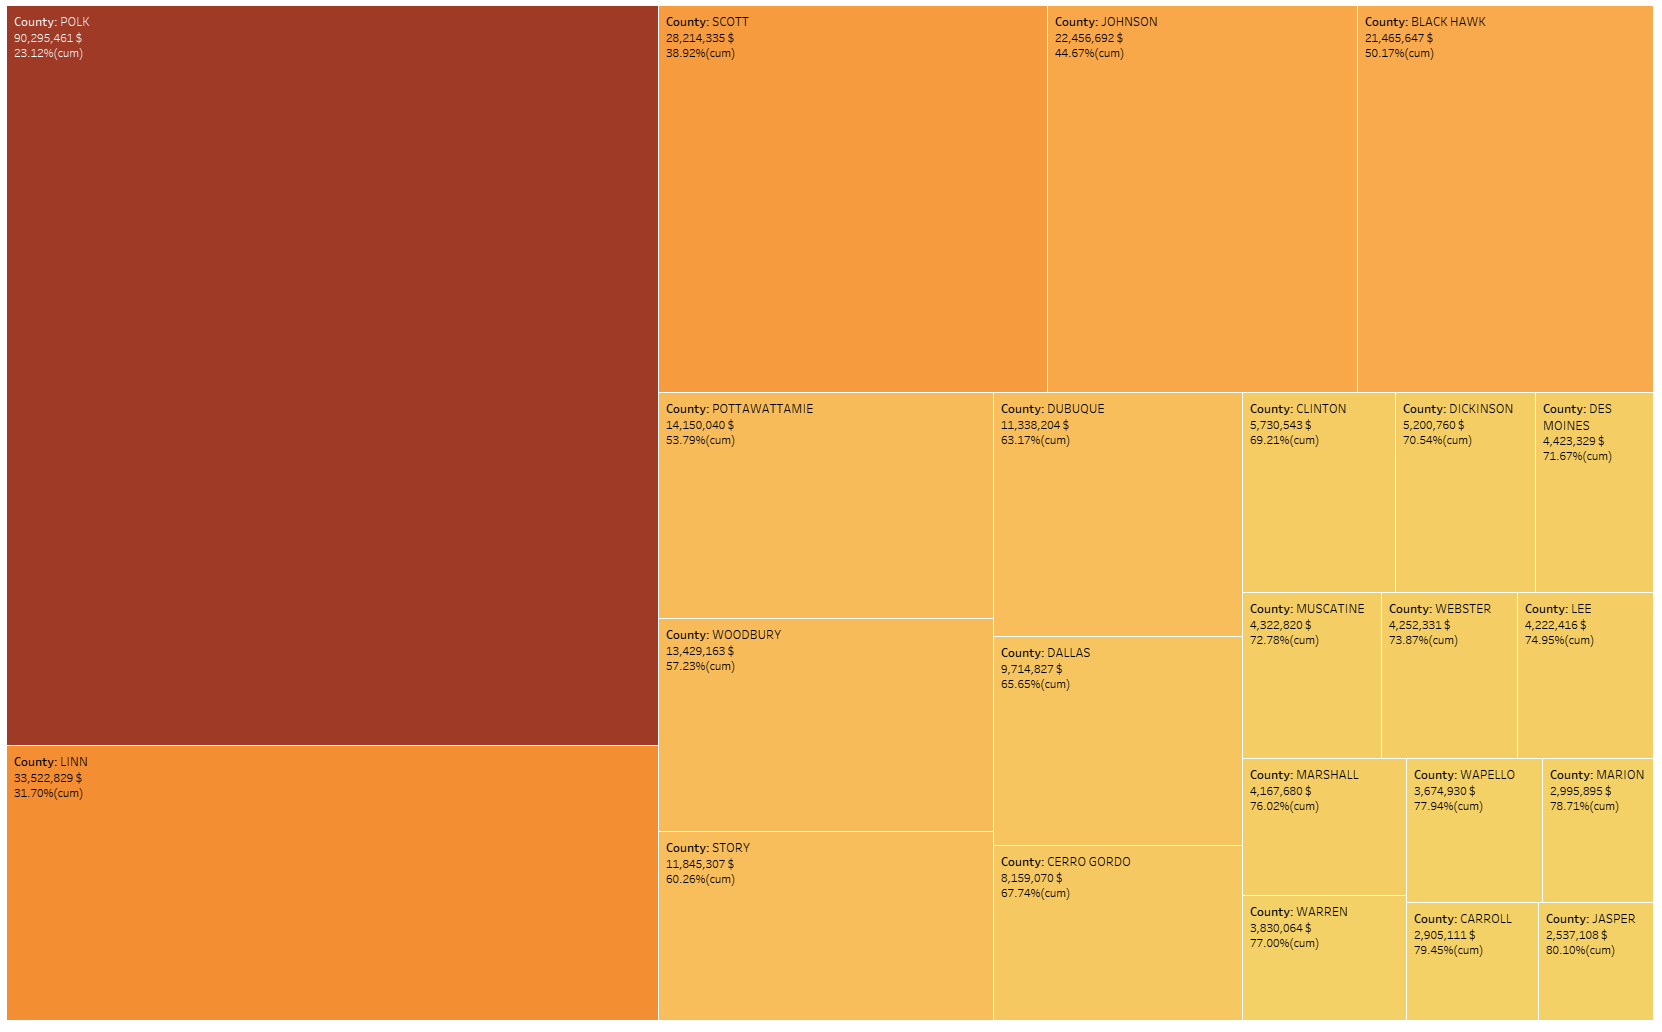

Let's see how the ~20% of the counties that represents ~80% of the best in profit, are geographically distributed in the State (Iowa).

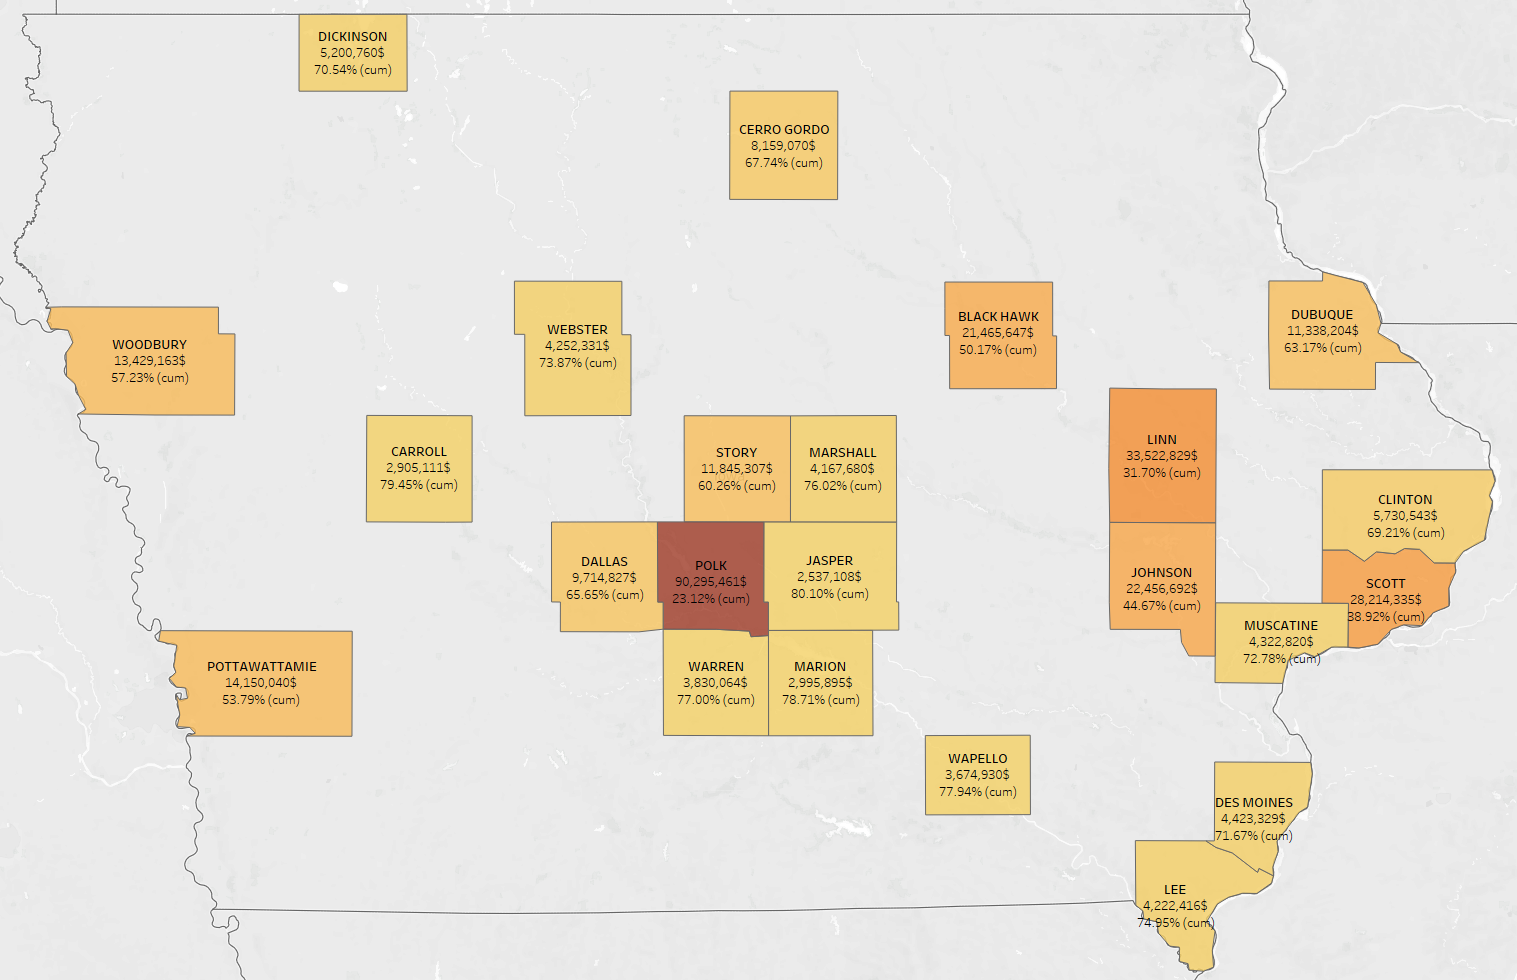

**Conclusions from Step 2 and Step 3:**
- We have identified which counties Iowa Alcoholic Beverages Division should focus on.
- The counties which were identified to be part of both steps are:
  - Black Hawk.
  - Cerro Gordo.
  - Clinton.
  - Dallas.
  - Des Moines.
  - Dickinson.
  - Dubuque.
  - Jasper.
  - Johnson.
  - Lee.
  - Linn.
  - Marion.
  - Marshall.
  - Muscatine.
  - Polk.
  - Pottawattamie.
  - Scott.
  - Story.
  - Wapello.
  - Warren.
  - Webster.
  - Woodbury.
- The list above is considered critical, being the main focus point. Those are the counties with higher sales (Gallons) and higher profit levels. 100% of the profitable counties are included.
- Boone, Bremer, Hardin, and Sioux are the counties that could be considered as a second priority. 

**STEP 4:**
- Before plotting, we should keep in mind that our focus point is 'Volume Sold (Gallons)' because is the Target.
- 'State Profit' was explored in order to identify which counties Iowa Alcoholic Beverages Division should focus on as they are looking to agile their Quality Control checkpoints.
- In this part of the section, we are going to consider the Pareto results about those countries that have been reported as having the highest sales volume.


Using a Packed Bubbles graph we can see how Polk County is the highest consumer in 2019, 2020, and 2021.

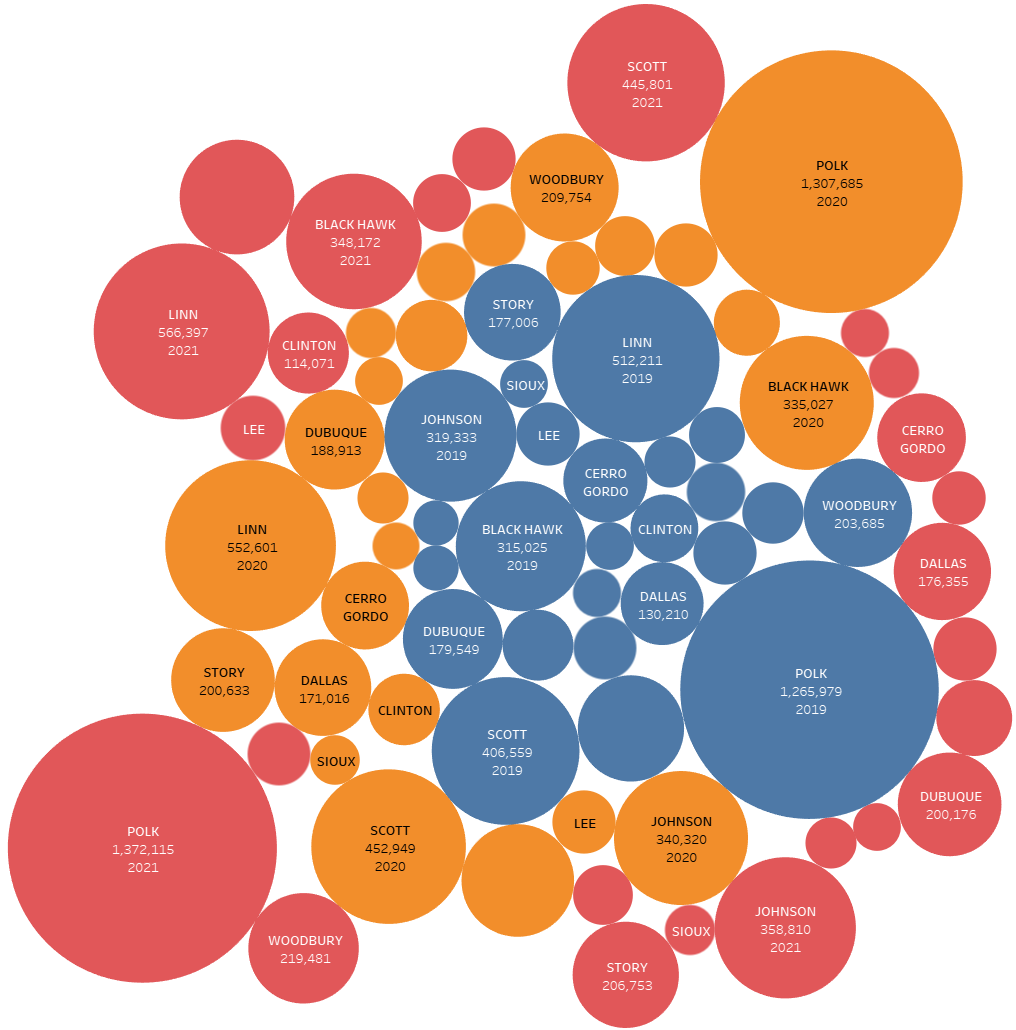

We decided to plot a Stacked Bar in order to identify any insights related to the performance per quarter. The graph below shows that the sales volume every three months is pretty stable.

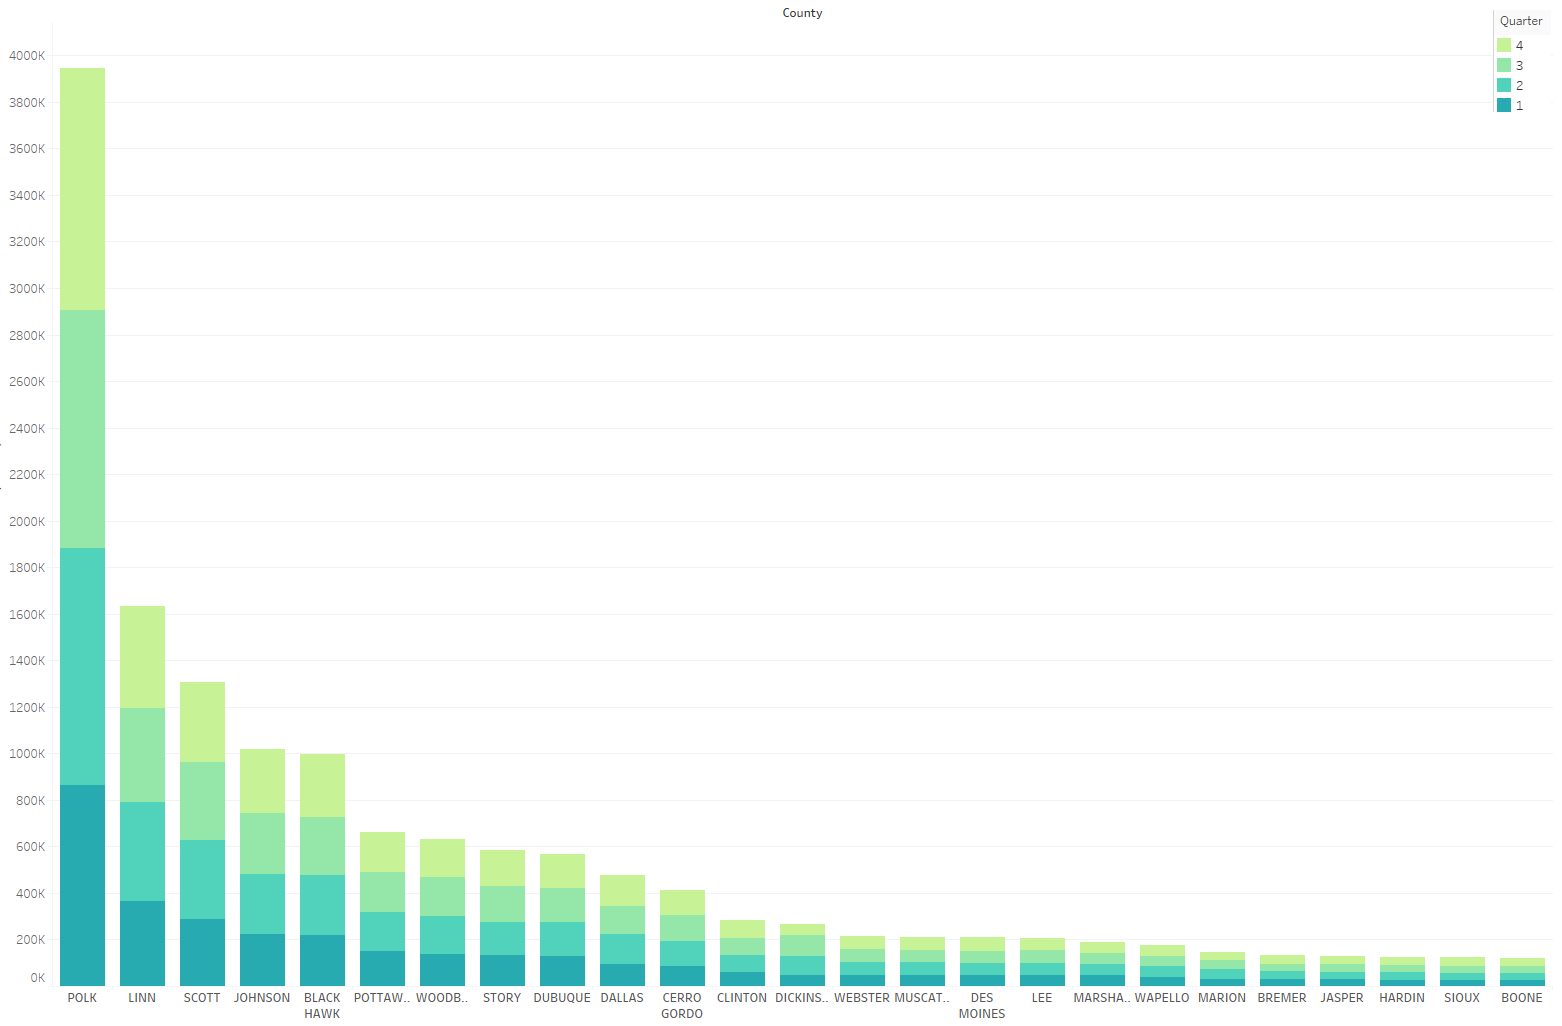

#E. Conclusions

- More than confirm that Polk County is the highest buyer every year, their consumption increased by 3.29% in 2020, and 4.9% in 2021.
- Linn County, the second on the list, its consumption increased 7.8% in 2020 but only 2.5% in 2021.
- The third County on the list is Scott with an 11.4% increment in 2020 but -1.5% in 2021.
- Johnson as the fourth on the list, increased by 6.6% in 2020, and 5.4% in 2021.
- Black Hawk County increased 6.3% in 2020 but only 3.9% in 2021.
- Those are some reasons we included the Profit Analysis, so our stakeholders can work closely with those top counties in order to accomplish their objectives as the Iowa Alcoholic Beverages Division.